# 1. Xử lý review

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv(r"C:\Users\acer\Downloads\reviews_new.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20419 entries, 0 to 20418
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   review_id          20419 non-null  int64  
 1   reviewer_name      20419 non-null  object 
 2   reviewer_info      20419 non-null  object 
 3   rating             20419 non-null  int64  
 4   review_time        20419 non-null  object 
 5   review_text        20419 non-null  object 
 6   service_rating     16662 non-null  float64
 7   food_rating        16628 non-null  float64
 8   atmosphere_rating  16612 non-null  float64
 9   service_type       20419 non-null  object 
 10  meal_type          20419 non-null  object 
 11  language           20419 non-null  object 
 12  nation             20419 non-null  object 
 13  created_at         20419 non-null  object 
 14  restaurant_id      20419 non-null  int64  
dtypes: float64(3), int64(3), object(9)
memory usage: 2.3+ MB


In [4]:
df.head()

,review_id,reviewer_name,reviewer_info,rating,review_time,review_text,service_rating,food_rating,atmosphere_rating,service_type,meal_type,language,nation,created_at,restaurant_id
0,1,Joe Greco,Local Guide · 46 reviews · 28 photos,5,3 weeks ago,As soon as the food arrived I knew I’d made th...,5.0,5.0,5.0,Unknown,Unknown,Unknown,Unknown,2025-03-20 23:57:54.067,1
1,2,Annie Song,Local Guide · 172 reviews · 684 photos,5,3 weeks ago,"As Vietnamese living overseas, we loved the fl...",5.0,5.0,5.0,Dine in,Lunch,Unknown,Unknown,2025-03-20 23:57:43.930,1
2,3,Jiwon Kim,4 reviews · 11 photos,5,2 months ago,It was a huge and cozy place to try Vietnam st...,5.0,5.0,5.0,Dine in,Lunch,Unknown,Unknown,2025-03-20 23:58:04.227,1
3,4,katsie tang,Local Guide · 11 reviews · 14 photos,3,5 months ago,Had the beef pho and fried rice.\r\nFlavors no...,3.0,3.0,4.0,Dine in,Lunch,Unknown,Unknown,2025-03-20 23:58:24.627,1
4,5,Riina Runnel,Local Guide · 12 reviews · 22 photos,5,5 months ago,I would like to give more stars! I'm a big fan...,5.0,5.0,5.0,Unknown,Unknown,Unknown,Unknown,2025-03-21 00:00:16.657,1


In [5]:
import pandas as pd
from datetime import datetime, timedelta
import re

# Chuyển đổi cột `created_at` sang datetime
df["created_at"] = pd.to_datetime(df["created_at"])


# Hàm xử lý thời gian review
def convert_review_time(created_time, review_time):
    if pd.isnull(review_time):
        return None
    # Nếu có chữ "hour" hoặc "minute" → gán ngày bằng ngày created_at
    if "hour" in review_time or "minute" in review_time:
        return created_time.date()
    # Xử lý trường hợp "a" thành "1"
    review_time = review_time.replace("a ", "1 ")
    # Regex bắt thông tin
    match = re.match(r"(\d+) (day|week|month|year)s? ago", review_time)
    if not match:
        return None  # Nếu không khớp
    amount, unit = int(match.group(1)), match.group(2)
    # Tính toán delta
    if unit == "day":
        delta = timedelta(days=amount)
    elif unit == "week":
        delta = timedelta(weeks=amount)
    elif unit == "month":
        delta = timedelta(days=amount * 30)
    elif unit == "year":
        delta = timedelta(days=amount * 365)
    # Tính ngày review
    return (created_time - delta).date()
# Áp dụng vào DataFrame
df["review_date"] = df.apply(lambda x: convert_review_time(x["created_at"], x["review_time"]), axis=1)
# Kết quả
print(df[["created_at", "review_time", "review_date"]])

                   created_at   review_time review_date
0     2025-03-20 23:57:54.067   3 weeks ago  2025-02-27
1     2025-03-20 23:57:43.930   3 weeks ago  2025-02-27
2     2025-03-20 23:58:04.227  2 months ago  2025-01-19
3     2025-03-20 23:58:24.627  5 months ago  2024-10-21
4     2025-03-21 00:00:16.657  5 months ago  2024-10-22
...                       ...           ...         ...
20414 2025-05-02 13:09:35.527  7 months ago  2024-10-04
20415 2025-05-02 13:09:35.527    a year ago  2024-05-02
20416 2025-05-02 13:09:35.527    a year ago  2024-05-02
20417 2025-05-02 13:09:35.527  3 months ago  2025-02-01
20418 2025-05-02 13:09:35.527    a year ago  2024-05-02

[20419 rows x 3 columns]


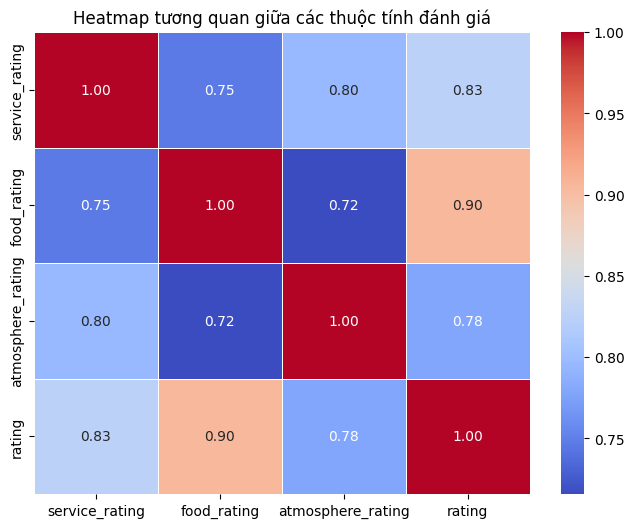

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Chọn các cột liên quan
corr_columns = ["service_rating", "food_rating", "atmosphere_rating", "rating"]
df_corr = df[corr_columns].corr()

# Vẽ heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df_corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Heatmap tương quan giữa các thuộc tính đánh giá")
plt.show()

In [7]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Lọc dữ liệu không bị thiếu
train_data = df.dropna(subset=["service_rating", "rating"])

# Khởi tạo mô hình hồi quy tuyến tính
model = LinearRegression()
model.fit(train_data[["rating"]], train_data["service_rating"])

# Tạo mask để lọc các dòng bị thiếu
missing_mask = df["service_rating"].isna()

# Dự đoán và điền giá trị thiếu vào DataFrame
df.loc[missing_mask, "service_rating"] = model.predict(df.loc[missing_mask, ["rating"]])

In [8]:
# Lọc dữ liệu không bị thiếu
train_data = df.dropna(subset=["food_rating", "rating"])

# Khởi tạo mô hình hồi quy tuyến tính
model = LinearRegression()
model.fit(train_data[["rating"]], train_data["food_rating"])

# Tạo mask để lọc các dòng bị thiếu
missing_mask = df["food_rating"].isna()

# Dự đoán và điền giá trị thiếu vào DataFrame
df.loc[missing_mask, "food_rating"] = model.predict(df.loc[missing_mask, ["rating"]])

In [9]:
# Lọc dữ liệu không bị thiếu
train_data = df.dropna(subset=["atmosphere_rating", "rating"])

# Khởi tạo mô hình hồi quy tuyến tính
model = LinearRegression()
model.fit(train_data[["rating"]], train_data["atmosphere_rating"])

# Tạo mask để lọc các dòng bị thiếu
missing_mask = df["atmosphere_rating"].isna()

# Dự đoán và điền giá trị thiếu vào DataFrame
df.loc[missing_mask, "atmosphere_rating"] = model.predict(df.loc[missing_mask, ["rating"]])

In [10]:
df["review_date"] = pd.to_datetime(df["review_date"]).dt.date

In [11]:
# Hiển thị kết quả
print(df[["created_at", "review_time", "review_date"]])

                   created_at   review_time review_date
0     2025-03-20 23:57:54.067   3 weeks ago  2025-02-27
1     2025-03-20 23:57:43.930   3 weeks ago  2025-02-27
2     2025-03-20 23:58:04.227  2 months ago  2025-01-19
3     2025-03-20 23:58:24.627  5 months ago  2024-10-21
4     2025-03-21 00:00:16.657  5 months ago  2024-10-22
...                       ...           ...         ...
20414 2025-05-02 13:09:35.527  7 months ago  2024-10-04
20415 2025-05-02 13:09:35.527    a year ago  2024-05-02
20416 2025-05-02 13:09:35.527    a year ago  2024-05-02
20417 2025-05-02 13:09:35.527  3 months ago  2025-02-01
20418 2025-05-02 13:09:35.527    a year ago  2024-05-02

[20419 rows x 3 columns]


In [12]:
df.isnull().sum()

review_id            0
reviewer_name        0
reviewer_info        0
rating               0
review_time          0
review_text          0
service_rating       0
food_rating          0
atmosphere_rating    0
service_type         0
meal_type            0
language             0
nation               0
created_at           0
restaurant_id        0
review_date          0
dtype: int64

In [13]:
df["review_date"].fillna("Unknown", inplace=True)

C:\Users\acer\AppData\Local\Temp\ipykernel_3992\667004896.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["review_date"].fillna("Unknown", inplace=True)


In [14]:
df.to_csv("reviews_new.csv", index=False, encoding="utf-8-sig")

In [15]:
df[['review_id', 'reviewer_name','rating','review_date','review_text']].head(14000)


,review_id,reviewer_name,rating,review_date,review_text
0,1,Joe Greco,5,2025-02-27,As soon as the food arrived I knew I’d made th...
1,2,Annie Song,5,2025-02-27,"As Vietnamese living overseas, we loved the fl..."
2,3,Jiwon Kim,5,2025-01-19,It was a huge and cozy place to try Vietnam st...
3,4,katsie tang,3,2024-10-21,Had the beef pho and fried rice.\r\nFlavors no...
4,5,Riina Runnel,5,2024-10-22,I would like to give more stars! I'm a big fan...
...,...,...,...,...,...
13995,13996,Marteena Mendelssohn,5,2024-09-22,Is it possible to give 10 stars? Incredible se...
13996,13997,Derrick Lee,5,2024-11-21,After spending 2 weeks travelling throughout n...
13997,13998,Chun Li,2,2024-09-22,Pricey! Our mantis shrimps were extremely slim...
13998,13999,정다호,5,2025-02-28,"I ordered and ate coconut milk, and it smelled..."


# 2. Xử lý quận - nhà hàng

In [16]:
df2 = pd.read_csv(r"C:\Users\acer\Downloads\restaurants_new.csv")

In [17]:
df2.head()

,restaurant_id,restaurant_name,url,restaurant_type,rating_average,num_of_reviews,price_level,address,latitude,longitude,phone,created_at
0,1,Nhà hàng NHÀ BẾP CHỢ HÀN,https://www.google.com/maps/place/Nh%C3%A0+h%C...,Vietnamese restaurant,4.7,4406,₫100–200K,"22 Hùng Vương, Hải Châu 1, Hải Châu, Đà Nẵng 5...",16.068687,108.224312,2363966268,2025-03-20 23:52:16.330
1,2,Thìa Gỗ Restaurant Da Nang,https://www.google.com/maps/place/Th%C3%ACa+G%...,Vietnamese restaurant,4.8,6339,₫100–200K,"53 Phan Thúc Duyện, Bắc Mỹ Phú, Ngũ Hành Sơn, ...",16.052937,108.241562,2363689005,2025-03-21 00:31:56.500
2,3,Bếp Cuốn Đà Nẵng,https://www.google.com/maps/place/B%E1%BA%BFp+...,Vietnamese restaurant,4.8,7430,₫100–300K,"31-33 Trần Bạch Đằng, Phước Mỹ, Sơn Trà, Đà Nẵ...",16.057938,108.245186,702689989,2025-03-21 01:14:41.647
3,4,Cô Ba Phở bò,https://www.google.com/maps/place/C%C3%B4+Ba+P...,Restaurant,4.8,5432,₫100–200K,"154 Bạch Đằng, Hải Châu 1, Hải Châu, Đà Nẵng 5...",16.066938,108.224686,2363996268,2025-03-21 02:05:42.390
4,5,Nhà Hàng Nhà Bếp Khuê Mỹ,https://www.google.com/maps/place/Nh%C3%A0+H%C...,Vietnamese restaurant,4.6,4290,₫100–200K,"416 Võ Nguyên Giáp, Bắc Mỹ An, Ngũ Hành Sơn, Đ...",16.041937,108.248314,2363958080,2025-03-21 02:44:52.247


In [19]:
df3 = pd.read_csv(r"D:\Nam3_Ky2\DeAnThucHanh\Crawl\Code_Crawl\Quan.csv")

In [20]:
df3['Quận huyện']

0          Cẩm Lệ
1        Hải Châu
2      Liên Chiểu
3    Ngũ Hành Sơn
4         Sơn Trà
5       Thanh Khê
6        Hòa Vang
7        Hoàng Sa
Name: Quận huyện, dtype: object

In [21]:
quan_list = df3["Quận huyện"].dropna().tolist()

# Hàm kiểm tra quận/huyện trong địa chỉ
def find_district(address):
    for quan in quan_list:
        if pd.notna(address) and quan in address:  
            return quan
    return "Không xác định"  
# Áp dụng vào df
df2["district"] = df2["address"].apply(find_district)

print(df2.head())

   restaurant_id             restaurant_name  \
0              1    Nhà hàng NHÀ BẾP CHỢ HÀN   
1              2  Thìa Gỗ Restaurant Da Nang   
2              3            Bếp Cuốn Đà Nẵng   
3              4                Cô Ba Phở bò   
4              5    Nhà Hàng Nhà Bếp Khuê Mỹ   

                                                 url        restaurant_type  \
0  https://www.google.com/maps/place/Nh%C3%A0+h%C...  Vietnamese restaurant   
1  https://www.google.com/maps/place/Th%C3%ACa+G%...  Vietnamese restaurant   
2  https://www.google.com/maps/place/B%E1%BA%BFp+...  Vietnamese restaurant   
3  https://www.google.com/maps/place/C%C3%B4+Ba+P...             Restaurant   
4  https://www.google.com/maps/place/Nh%C3%A0+H%C...  Vietnamese restaurant   

   rating_average  num_of_reviews price_level  \
0             4.7            4406   ₫100–200K   
1             4.8            6339   ₫100–200K   
2             4.8            7430   ₫100–300K   
3             4.8            5432   ₫100

In [28]:
df2[['restaurant_id', 'restaurant_name','district']].head(14000)

,restaurant_id,restaurant_name,district
0,1,Nhà hàng NHÀ BẾP CHỢ HÀN,Hải Châu
1,2,Thìa Gỗ Restaurant Da Nang,Ngũ Hành Sơn
2,3,Bếp Cuốn Đà Nẵng,Sơn Trà
3,4,Cô Ba Phở bò,Hải Châu
4,5,Nhà Hàng Nhà Bếp Khuê Mỹ,Ngũ Hành Sơn
...,...,...,...
63,67,Bếp Quê,Hải Châu
64,68,Riverside Terrace Restaurant (formerly L'Itali...,Sơn Trà
65,69,Ơ Kìa - Seafood Restaurant,Hải Châu
66,70,Roots Plant-based Cafe - Healthy Vegan restaurant,Ngũ Hành Sơn


In [ ]:
df2.to_csv("restaurants_new.csv", index=False, encoding="utf-8-sig")